In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#ticker = ['GOLDBEES.NS','NIFTYBEES.NS']
ticker = ['GC=F','INR=X','^BSESN']
df = yf.download(ticker)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
df['GOLDBEES.NS'] = df.iloc[:,1]*df.iloc[:,0]
df['NIFTYBEES.NS'] = df['^BSESN']
df = df.iloc[:,-2:]
df=df.dropna()

In [ ]:
df['ratio'] = df.iloc[:,1]/df.iloc[:,0]
df['ratio_yearly_ret'] = df['ratio']/df['ratio'].shift(252)
df['nifty_ret'] = (df['NIFTYBEES.NS']/df['NIFTYBEES.NS'].shift()) * 1
df['gold_ret'] = (df['GOLDBEES.NS']/df['GOLDBEES.NS'].shift()) * 1
df = df.resample('Y').last()
df = df.dropna()
df['nifty_weight'] = 50

In [ ]:
ratio = []
weights = []

for i in np.arange(0, 2.1, 0.1):

  i = round(i,1)

  ratio.append(i)

for j in range(0,105,5):

    weights.append(j)

In [ ]:
ratio_weights_dict = dict(zip(ratio, weights))

In [ ]:
print(ratio_weights_dict)

{0.0: 0, 0.1: 5, 0.2: 10, 0.3: 15, 0.4: 20, 0.5: 25, 0.6: 30, 0.7: 35, 0.8: 40, 0.9: 45, 1.0: 50, 1.1: 55, 1.2: 60, 1.3: 65, 1.4: 70, 1.5: 75, 1.6: 80, 1.7: 85, 1.8: 90, 1.9: 95, 2.0: 100}


In [ ]:
for index, value in df['ratio_yearly_ret'].iteritems():
  value = value-0.1
  value = round(value, 1)
  #df['nifty_weight'][index] = ratio_weights_dict[value]

<ipython-input-50-fc543488a245>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['ratio_yearly_ret'].iteritems():


In [ ]:
df['gold_weight'] = 100 - df['nifty_weight']

In [ ]:
df['strategy_ret'] = (df['nifty_weight'].shift()*df['nifty_ret'] + df['gold_weight'].shift()*df['gold_ret'])/100
df = df.dropna()

In [ ]:
df['strategy_nav'] = df['strategy_ret'].cumprod()
df['nifty_nav'] = df['nifty_ret'].cumprod()
df['gold_nav'] = df['gold_ret'].cumprod()

In [ ]:
names = df.columns[-3:]
cum_max = names + '_cummax'
dd = names + '_dd'

In [ ]:
for i in range(len(names)):
  df[cum_max[i]] = df[names[i]].cummax()
  df[dd[i]] = (df[names[i]]/df[cum_max[i]] - 1)*100

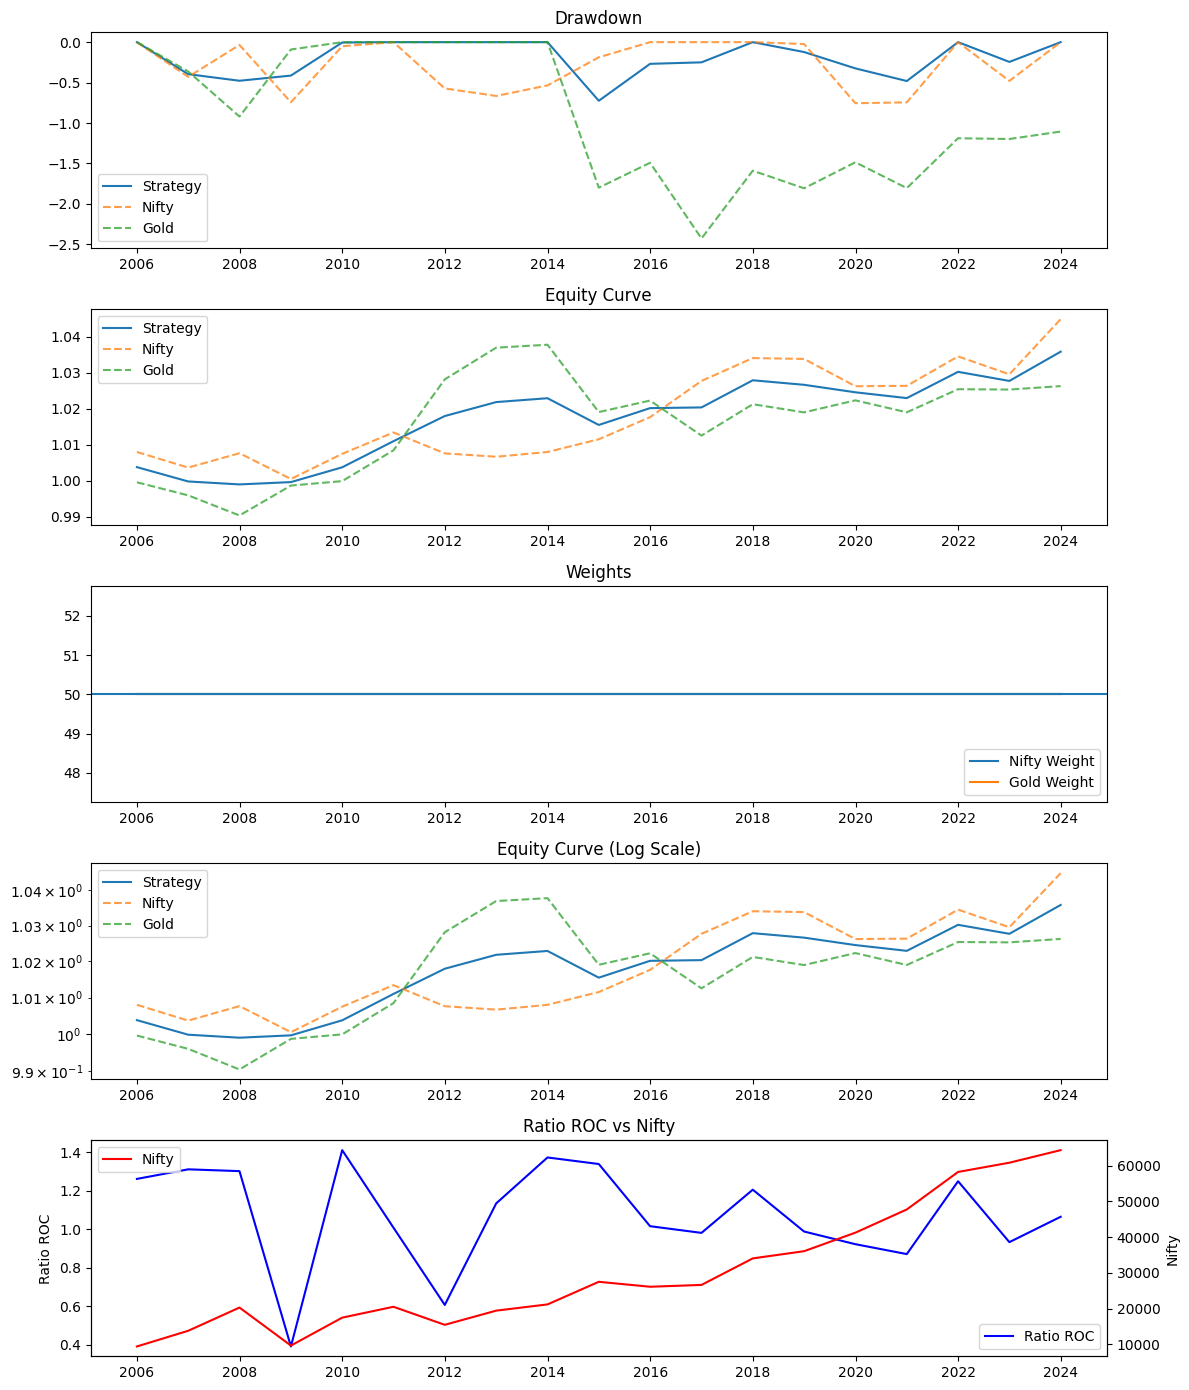

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(12, 14))

# Drawdown
axs[0].plot(df['strategy_nav_dd'], label='Strategy')
axs[0].plot(df['nifty_nav_dd'], linestyle='--', alpha=0.75, label='Nifty')
axs[0].plot(df['gold_nav_dd'], linestyle='--', alpha=0.75, label='Gold')
axs[0].legend()
axs[0].set_title('Drawdown')

# Equity Curve
axs[1].plot(df['strategy_nav'], label='Strategy')
axs[1].plot(df['nifty_nav'], linestyle='--', alpha=0.75, label='Nifty')
axs[1].plot(df['gold_nav'], linestyle='--', alpha=0.75, label='Gold')
axs[1].legend()
axs[1].set_title('Equity Curve')

# Weights
axs[2].plot(df['nifty_weight'], label='Nifty Weight')
axs[2].plot(df['gold_weight'], label='Gold Weight')
axs[2].axhline(y=50)
axs[2].legend(loc='lower right')
axs[2].set_title('Weights')

# Equity Curve (Log Scale)
axs[3].plot(df['strategy_nav'], label='Strategy')
axs[3].plot(df['nifty_nav'], linestyle='--', alpha=0.75, label='Nifty')
axs[3].plot(df['gold_nav'], linestyle='--', alpha=0.75, label='Gold')
axs[3].legend()
axs[3].set_title('Equity Curve (Log Scale)')
axs[3].set_yscale('log')

# Ratio ROC vs Nifty
ax1 = axs[4]
ax2 = ax1.twinx()
ax1.plot(df['ratio_yearly_ret'], color='blue', label='Ratio ROC')
ax2.plot(df['NIFTYBEES.NS'], color='red', label='Nifty')
ax1.set_ylabel('Ratio ROC')
ax1.legend(loc='lower right')
ax2.set_ylabel('Nifty')
ax2.legend()
ax1.set_title('Ratio ROC vs Nifty')

plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,GOLDBEES.NS,NIFTYBEES.NS,ratio,ratio_yearly_ret,nifty_ret,gold_ret,nifty_weight,gold_weight,strategy_ret,strategy_nav,nifty_nav,gold_nav,strategy_nav_cummax,strategy_nav_dd,nifty_nav_cummax,nifty_nav_dd,gold_nav_cummax,gold_nav_dd
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,82999.036747,29975.209139,0.365567,1.071016,1.166436,1.124956,50.0,50.0,1.145696,5.427997,4.595634,4.345513,5.469024,-1.157727,4.771972,-5.498833,4.570620,-4.641635
std,40261.972131,17113.709194,0.099269,0.264507,0.286485,0.131640,0.0,0.0,0.154883,3.039273,2.623780,2.107963,3.016514,2.990277,2.479492,12.995875,2.108115,7.903935
min,23253.986533,9397.929688,0.186232,0.390699,0.475542,0.809740,50.0,50.0,0.885862,1.329165,1.440839,1.217490,1.329165,-11.413838,1.440839,-52.445831,1.217490,-23.160314
25%,57248.385632,18445.760742,0.331448,0.956383,1.047472,1.054261,50.0,50.0,1.054530,3.456421,2.828003,2.997307,3.456421,0.000000,3.127315,-4.099795,2.997307,-5.634944
50%,78122.948456,26117.539062,0.370660,1.058616,1.157503,1.108721,50.0,50.0,1.154721,4.767650,4.004198,4.090220,5.048259,0.000000,4.216060,0.000000,4.801080,0.000000
75%,100028.692135,38661.033203,0.405556,1.280868,1.288999,1.214891,50.0,50.0,1.215660,6.905150,5.927297,5.237121,6.905150,0.000000,5.927297,0.000000,5.237121,0.000000
max,156830.133682,63915.421875,0.619154,1.409982,1.810330,1.303205,50.0,50.0,1.503434,11.269836,9.799161,8.211028,11.269836,0.000000,9.799161,0.000000,8.211028,0.000000


Text(0.5, 1.0, 'Correlation Between Gold and Nifty')

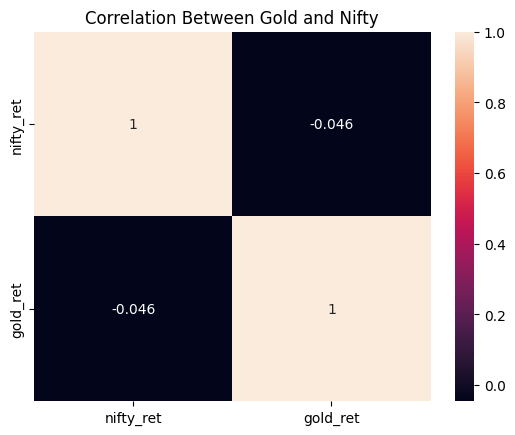

In [ ]:
sns.heatmap(df[['nifty_ret','gold_ret']].corr(), annot =True)
plt.title('Correlation Between Gold and Nifty')

In [ ]:
len(df)

19